In [9]:
from collections import defaultdict, deque
import graphviz
import os

In [10]:
# 残余容量を記録するというより、流れた量flowPassed(残余容量＝capacity-流れた量で求まる)を記録する

# N:ノードの数　
# W:エッジ(辺)の数
# start: スタート
# goal:　ゴール
# xyz (x:始点、y:終点、z:重み)

N = 5
W = 7
start = 0
goal = 4

xyz = [(0, 1, 10),
       (0, 2, 2),
       (1, 2, 6),
       (1, 3, 6),
       (3, 2, 3),
       (2, 4, 5),
       (3, 4, 8)]

cap = [[0]*N for i in range(N)] # capacity 流すことができる量
flowPassed = [[0]*N for i in range(N)] # 流れた量を記録
gragh = defaultdict(list) # パスの情報

for i in range(W):
    fr, to, c = xyz[i]
    cap[fr][to] = c
    gragh[fr].append(to)
    gragh[to].append(fr)

parantsList = [-1] * N # bfsの経路を保存
cntPathCap = [0] * N # currentPathCapacity 

In [11]:
def change_arrow_and_color(s, g, flow):
    G.edge(str(s), str(g), label=str(cap[s][g])+"("+str(flow)+")", color="red")
    G.node(str(s), fillcolor="red")
    G.node(str(g), fillcolor="red")
    
def reset_color(s, g):
    G.edge(str(s), str(g), color="black")
    G.node(str(s), fillcolor="white")
    G.node(str(g), fillcolor="white")
    
picnum = 0
def save_graph(name=""):
    global picnum
    if name == "":
        name = str(picnum)
        picnum += 1
    G.render("svg/"+name)
    os.remove("svg/"+name)

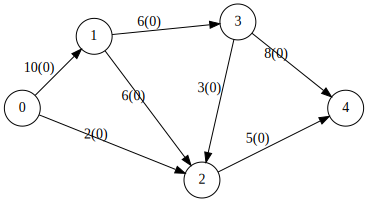

In [12]:
G = graphviz.Digraph(engine='neato', format='svg', strict=True)
positions = ["0,0!", "1,1!", "2.5,-1!", "3,1.2!", "4.5,0!"]
for i in range(N):
    G.node(str(i), pos=positions[i], shape='circle', style="filled", fillcolor="white")
for i in range(W):
    G.edge(str(xyz[i][0]), str(xyz[i][1]), label=str(xyz[i][2])+"("+str(0)+")")
display(G) #()の中の数字は流れた量
#save_graph("default")

In [13]:
def bfs(start, goal):
    global parantsList
    global cntPathCap
    parantsList = [-1] * N
    cntPathCap = [0] * N
    q = deque()
    q.append(start)
    parantsList[start] = -2 # startの親は存在しない
    cntPathCap[start] = 10**9 # とりあえずいっぱい流してみる
    while len(q) != 0:
        cnt = q.popleft()
        for to in gragh[cnt]:
            if parantsList[to] == -1 and cap[cnt][to] - flowPassed[cnt][to] > 0:
                parantsList[to] = cnt 
                # 現在流れてきた量をどれぐらい次に流せるかを考慮
                cntPathCap[to] = min(cntPathCap[cnt], cap[cnt][to] - flowPassed[cnt][to]) 
                if to == goal:
                    return cntPathCap[goal]
                q.append(to)
    return 0

In [14]:
def edmondsKarp(start, goal):
    maxFlow = 0
    while True:
        flow = bfs(start, goal)
        if flow == 0:
            break
        maxFlow += flow
        cnt = goal # 経路をgoalからstartにたどる
        while (cnt != start):
            pre = parantsList[cnt]
            flowPassed[pre][cnt] += flow
            flowPassed[cnt][pre] -= flow 
            change_arrow_and_color(pre, cnt, flowPassed[pre][cnt])
            cnt = pre
        
        display(G)
        #save_graph()
        cnt = goal 
        while (cnt != start):
            pre = parantsList[cnt]
            reset_color(pre, cnt) # 色をもとに戻す
            cnt = pre
        
    return maxFlow

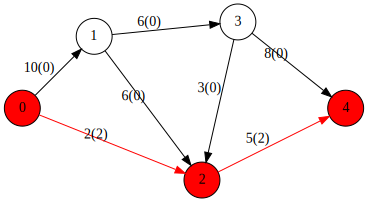

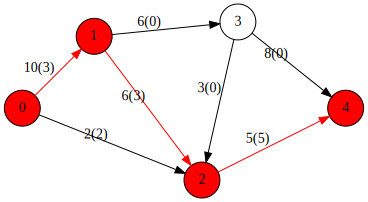

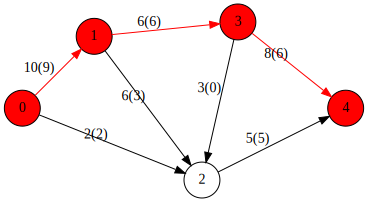

11

In [15]:
edmondsKarp(start, goal)

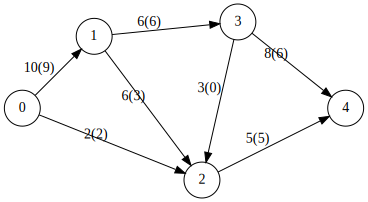

In [16]:
display(G)
#save_graph("final")